https://docs.xarray.dev/en/stable/generated/xarray.Dataset.curvefit.html

https://github.com/pydata/xarray/blob/6d98dbd644ac264c9c67db78d9a5ae011019b0ec/doc/user-guide/computation.rst#L562

https://github.com/pydata/xarray/pull/4849

In [16]:
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
import rioxarray as rxa
import dask 

from taus import fit_coh_decay_model, decorrelation_temporal_model

indir = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/coherence')
outdir = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/coherence/taus')

In [3]:
for loc_fp in indir.glob('*.nc'):
    if 'Grand' in loc_fp.name:
        vv_cor = xr.open_dataset(loc_fp)
        vv_cor = vv_cor.drop('band')
        t_delta = pd.to_timedelta(vv_cor.flight2 - vv_cor.time)
        vv_cor['temporal_baseline'] = xr.DataArray(t_delta / pd.to_timedelta('1 day'), coords = {"time": vv_cor.time})
        vv_cor = vv_cor.chunk({'x': 100, 'y': 100})
        res = vv_cor['vv_coh'].curvefit(coords = vv_cor.temporal_baseline, func = decorrelation_temporal_model, reduce_dims = 'time', p0 = {'gamma_inf' : 0.3, 'tau': 5}, bounds={"gamma_inf": (0, 0.6)}, kwargs = {'maxfev': 5000})
        res.to_netcdf(outdir.joinpath(loc_fp.name.replace(' ', '-')))

In [17]:
res.to_netcdf(outdir.joinpath(loc_fp.name.replace(' ', '-')))

/bsuhome/zacharykeskinen/uavsar-coherence/src/funcs/taus.py:16: RuntimeWarning: overflow encountered in exp
  coherence =  gamma_inf + (1 - gamma_inf) * np.exp(- t / tau)
/bsuhome/zacharykeskinen/miniconda3/envs/coherence/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [18]:
ds = xr.open_dataset(outdir.joinpath(loc_fp.name.replace(' ', '-')))

In [19]:
ds

<xarray.Dataset>
Dimensions:                (x: 100, y: 100, param: 2, cov_i: 2, cov_j: 2)
Coordinates:
  * x                      (x) float64 -108.0 -108.0 -108.0 ... -107.9 -107.9
  * y                      (y) float64 38.99 38.99 38.99 ... 38.96 38.96 38.96
  * param                  (param) object 'gamma_inf' 'tau'
  * cov_i                  (cov_i) object 'gamma_inf' 'tau'
  * cov_j                  (cov_j) object 'gamma_inf' 'tau'
Data variables:
    curvefit_coefficients  (y, x, param) float64 ...
    curvefit_covariance    (y, x, cov_i, cov_j) float64 ...

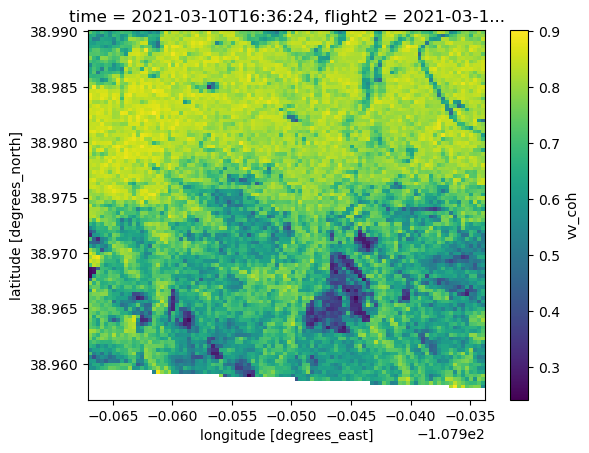

In [4]:
sm = vv_cor.isel(x = slice(1000, 1100), y = slice(600, 700))
sm['vv_coh'].isel(time = 0).plot()

In [3]:
vv_cor = vv_cor.chunk({'x': 100, 'y': 100})
res = vv_cor['vv_coh'].curvefit(coords = vv_cor.temporal_baseline, func = decorrelation_temporal_model, reduce_dims = 'time', p0 = {'gamma_inf' : 0.3, 'tau': 5}, bounds={"gamma_inf": (0, 0.6)}, kwargs = {'maxfev': 5000})

In [6]:
# sm = sm.chunk({'x': 100, 'y': 100})
res = sm['vv_coh'].curvefit(coords = sm.temporal_baseline, func = decorrelation_temporal_model, reduce_dims = 'time', p0 = {'gamma_inf' : 0.3, 'tau': 5}, bounds={"gamma_inf": (0, 0.6)}, kwargs = {'maxfev': 5000})

/bsuhome/zacharykeskinen/uavsar-coherence/src/funcs/taus.py:16: RuntimeWarning: overflow encountered in exp
  coherence =  gamma_inf + (1 - gamma_inf) * np.exp(- t / tau)
/bsuhome/zacharykeskinen/miniconda3/envs/coherence/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


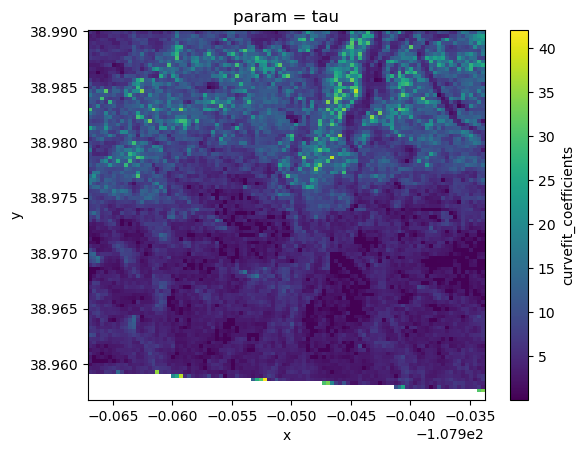

In [7]:
res['curvefit_coefficients'].sel(param = 'tau').plot()

/bsuhome/zacharykeskinen/uavsar-coherence/src/funcs/taus.py:16: RuntimeWarning: overflow encountered in exp
  coherence =  gamma_inf + (1 - gamma_inf) * np.exp(- t / tau)
/bsuhome/zacharykeskinen/miniconda3/envs/coherence/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


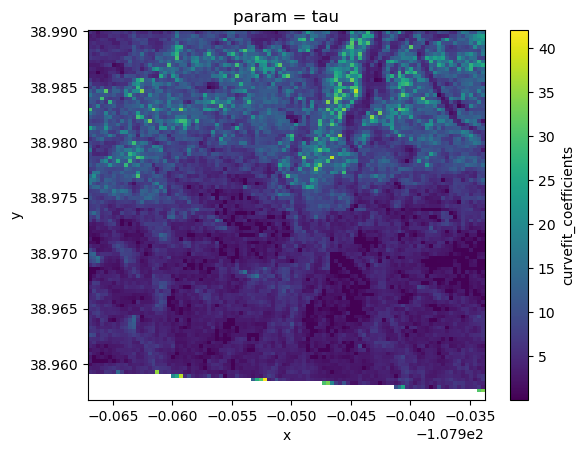

In [8]:
sm = sm.chunk({'x': 100, 'y': 100})
res = sm['vv_coh'].curvefit(coords = sm.temporal_baseline, func = decorrelation_temporal_model, reduce_dims = 'time', p0 = {'gamma_inf' : 0.3, 'tau': 5}, bounds={"gamma_inf": (0, 0.6)}, kwargs = {'maxfev': 5000})
res['curvefit_coefficients'].sel(param = 'tau').plot()

In [9]:
outdir = Path('/bsuhome/zacharykeskinen/scratch/data/uavsar/coherence/taus')

In [15]:
outdir.joinpath(loc_fp.name.replace(' ', '-'))

PosixPath('/bsuhome/zacharykeskinen/scratch/data/uavsar/coherence/taus/Rocky-Mountains-NP-CO_141_VV.nc')